In [3]:
### automatically refresh the buffer

%load_ext autoreload
%autoreload 2

### solve the auto-complete issue

%config Completer.use_jedi = False

### lvl 1 setups

import sys
sys.path.append('/portal1/dell/li-b/dem_lc')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### lvl 2 setups (systerm)

import os
import numpy as np
import pandas as pd
import xarray as xr
import glob

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shapereader
import matplotlib.ticker as mticker
import matplotlib as mpl

import rasterio
from matplotlib import pyplot
# from gistool import basemap, stack_image, stack_shp, stack_hatch, ncslice

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
shp_river = 'allrivers1.shp'
shp_bound = 'bound.shp'
shp_mete = 'meteosta.shp'

In [6]:
# dem data reading and processing
with rasterio.open('dem.tif') as dataset:
    data = dataset.read(1)

data = data.astype(float)

data[data > 5000] = np.nan
data_flipped = np.flip(data, axis=0)

# dem data reading and processing
with rasterio.open('LC_IGBP_2022_epsg4326.tif') as dataset:
    data_lc = dataset.read(1)
data_lc = data_lc.astype(float)
data_lc[data_lc == 0] = np.nan
data_lcflipped = np.flip(data_lc, axis=0)

In [12]:
# create colorbar
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import matplotlib.colors as mcolors
clist1 =['#d1e2c4','#367547','#c2a86c','#a4733e','#703327','#ffffff']
red1 = LinearSegmentedColormap.from_list('chaos',clist1)
clist2 =['#4C7300','#70A804','#70A804','#37A800','#E6E502','#FEFF03','#55FF00','#1FFEC5','#A93800','#9C9C9C','#FD5500','#FFFFBE']
red2 = mcolors.ListedColormap(clist2)

# create lon and lat for plot
lon = np.linspace(110.5,122,1381)
lat = np.linspace(24.5,34,1141)
lon_lc = np.linspace(110.5,122,231)
lat_lc = np.linspace(24.5,34,190)

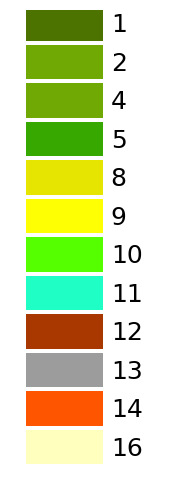

In [157]:
import matplotlib.colors as mcolors
from matplotlib.colors import BoundaryNorm
from matplotlib.patches import Rectangle
clist2_r = clist2[::-1]
custom_labels = ['1', '2', '4', '5', '8', '9', '10', '11', '12', '13', '14', '16']
custom_labels_r = custom_labels[::-1]
bounds = range(13)  # Defining boundaries for each color (12 colors need 13 boundaries)
fig, ax = plt.subplots(figsize=(2, 6))
ax.set_xlim(0, 1)
ax.set_ylim(0, len(bounds)-1)
gap = 0.2
rect_height = 0.9  # Adjust this value to change the height of rectangles
rect_width = 0.5
for i, color in enumerate(clist2_r):
    rect = Rectangle((0.1, i + gap), rect_width, rect_height, facecolor=color, edgecolor='none')
    ax.add_patch(rect)
ax.set_axis_off()
for i, label in enumerate(custom_labels_r):
    ax.text(0.65, i + rect_height/1.5, label, va='center', fontsize=18)  # Adjust fontsize if needed
plt.savefig('/portal1/dell/li-b/manu1_fig/fig1l2.png', dpi=300) 
plt.show()

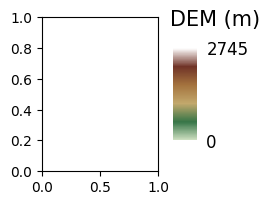

In [158]:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, Normalize

fig, ax = plt.subplots(figsize=(2, 2))
norm = Normalize(vmin=0, vmax=2745)  # Normalization of the color range
sm1 = plt.cm.ScalarMappable(cmap=red1, norm=norm)
sm1.set_array([])
cbar1 = fig.colorbar(sm1, ax=ax, orientation='vertical', pad=0.1, aspect=4, shrink=0.6)
cbar1.outline.set_visible(False)
cbar1.ax.tick_params(labelsize=12)
cbar1.set_ticks([norm.vmin, norm.vmax])  # Set ticks at min and max
cbar1.set_ticklabels([int(norm.vmin), int(norm.vmax)])  # Format the labels
cbar1.ax.tick_params(left=False, right=False, labelleft=False, labelright=True)
cbar1.ax.text(1.8, 1.2, 'DEM (m)', fontsize=15, ha='center', va='bottom', transform=cbar1.ax.transAxes)
plt.savefig('/portal1/dell/li-b/manu1_fig/fig1l1.png', dpi=300, bbox_inches='tight') 
plt.show()

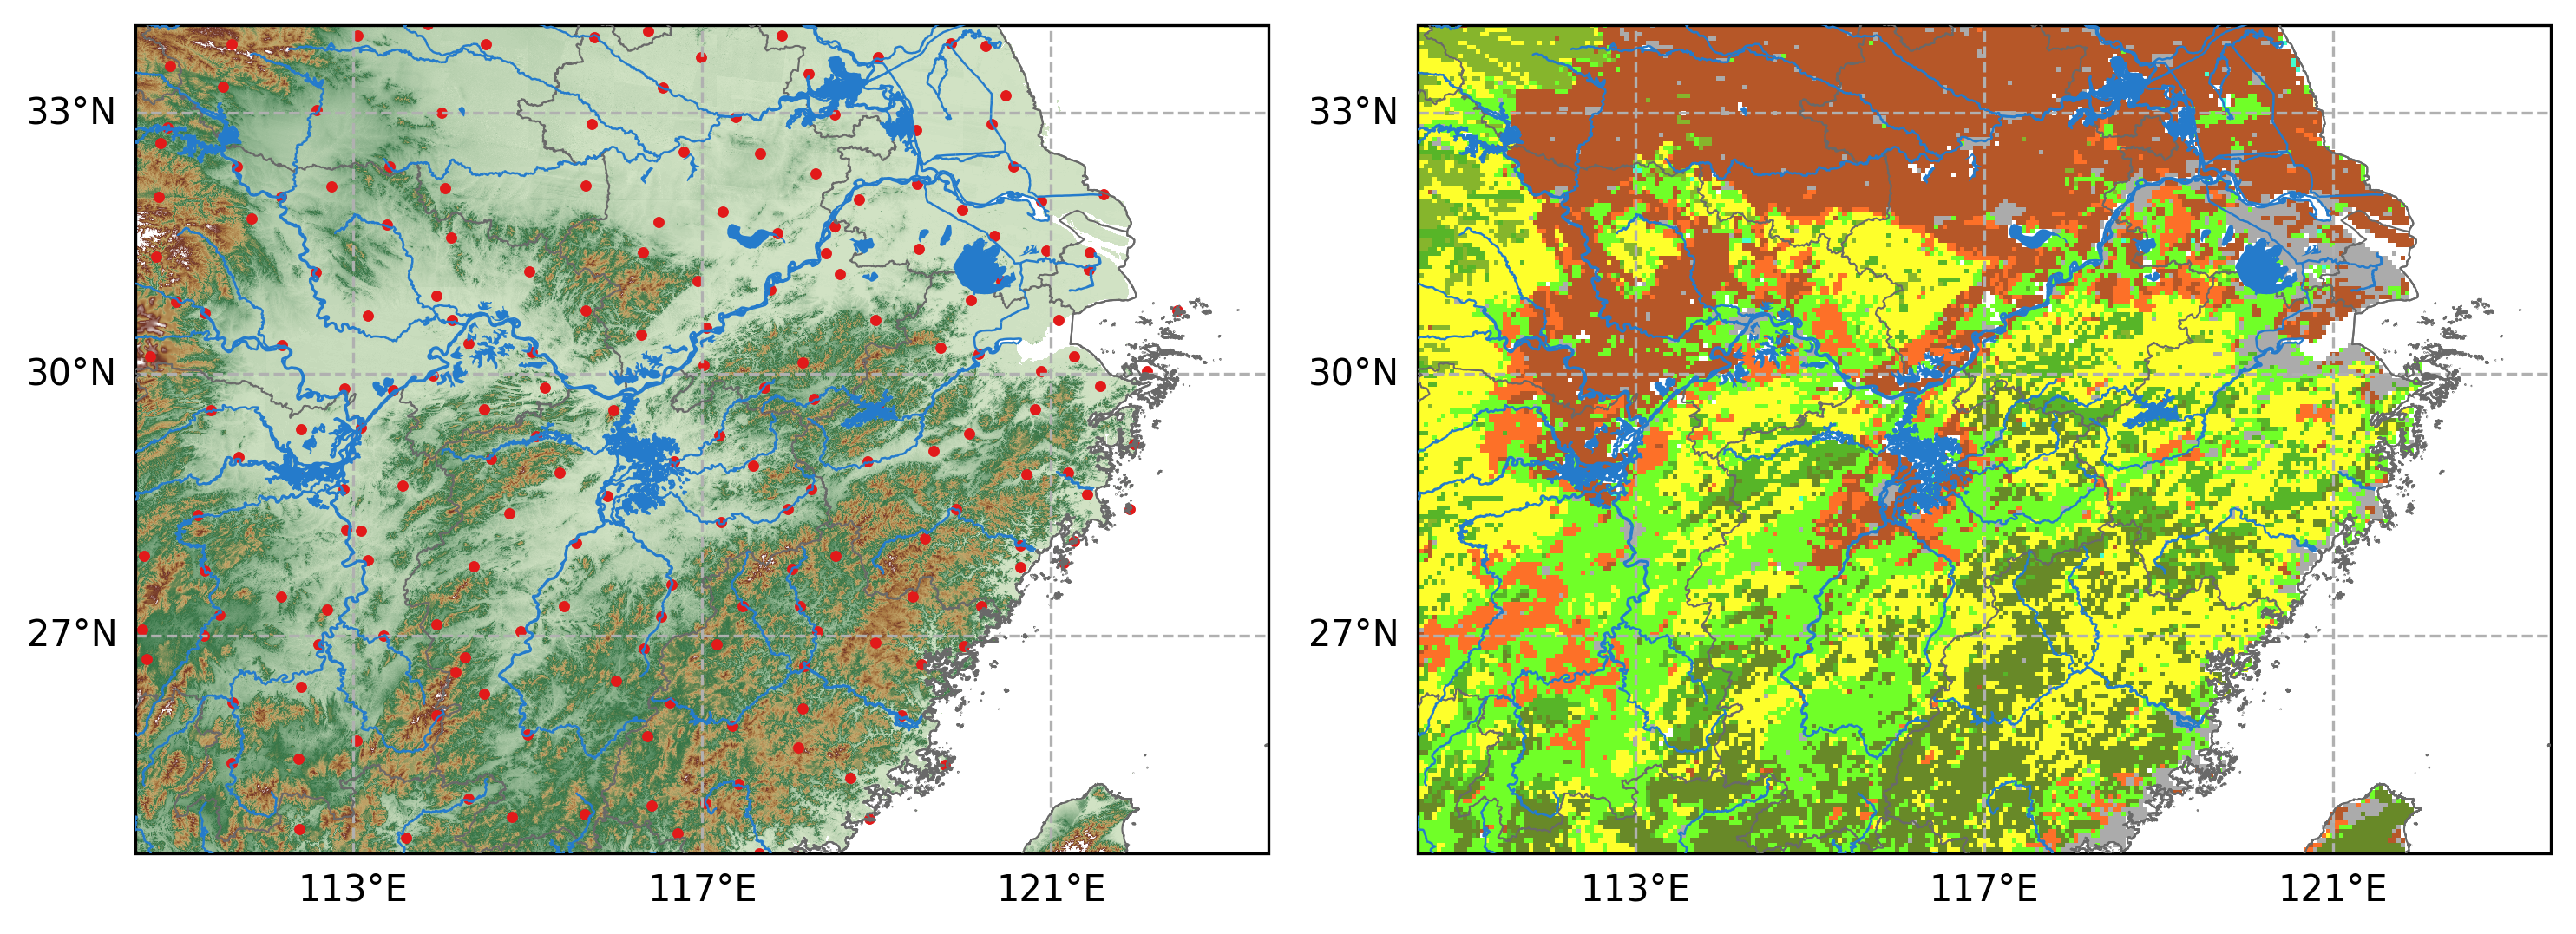

In [162]:
# Assuming lon, lat, and data_flipped are defined and available
fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=300, subplot_kw={'projection': ccrs.PlateCarree()})
extent = [110.5, 123.5, 24.5, 34]

# Longitude tick interval every 3 degrees and latitude tick interval every 2 degrees
x_ticks = np.arange(109, 124, 4)  # Longitude ticks every 3 degrees
y_ticks = np.arange(24, 34, 3)    # Latitude ticks every 2 degrees

for ax in axes:
    ax.set_extent(extent, crs=ccrs.Geodetic())
    # ax.add_feature(cfeature.LAND, edgecolor='dimgrey', facecolor='#dedede')
    # ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='w')
    # Set gridlines with custom intervals
    gridlines = ax.gridlines(draw_labels=True, linestyle='--')
    gridlines.xlabels_top = None
    gridlines.ylabels_right = None
    gridlines.xlocator = mticker.FixedLocator(x_ticks)
    gridlines.ylocator = mticker.FixedLocator(y_ticks)



    # Read and plot the station shapefile
    shp_mete = 'meteosta.shp'
    reader_mete = shapereader.Reader(shp_mete)
    geometries_mete = list(reader_mete.geometries())
    for geometry in geometries_mete:
        axes[0].plot(geometry.x, geometry.y, marker='o', color='#e21a1a', ms=2, transform=ccrs.PlateCarree())  # Adjust marker style as needed

    dem = axes[0].pcolormesh(lon, lat, data_flipped, transform=ccrs.PlateCarree(), cmap=red1, vmax=1800, vmin=0)
    lc = axes[1].pcolormesh(lon_lc, lat_lc, data_lcflipped, transform=ccrs.PlateCarree(), cmap=red2, alpha=0.6)
    # axes[1].add_feature(cfeature.OCEAN, edgecolor='none', facecolor='w',zorder=2)

    # Read and plot the boundary shapefile
    shp_bound = 'bound.shp'
    reader_bound = shapereader.Reader(shp_bound)
    geometries_bound = list(reader_bound.geometries())
    ax.add_geometries(geometries_bound, crs=ccrs.PlateCarree(), edgecolor='dimgrey', facecolor='none', lw=0.5,zorder=3)
    
    # Read and plot the river shapefile
    shp_river = 'allrivers1.shp'
    reader_river = shapereader.Reader(shp_river)
    geometries_river = list(reader_river.geometries())
    ax.add_geometries(geometries_river, crs=ccrs.PlateCarree(), edgecolor='#257bcb', facecolor='none', lw=0.6,zorder=4)

axes[0].add_feature(cfeature.LAKES, edgecolor='none', facecolor='#257bcb',zorder= 15)
axes[1].add_feature(cfeature.LAKES, edgecolor='none', facecolor='#257bcb',zorder= 15)

plt.tight_layout()
plt.savefig('/portal1/dell/li-b/manu1_fig/fig1.png', dpi=300, bbox_inches='tight') 
plt.show()